In [1]:
import tensorflow as tf
import keras
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import argparse
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
print(tf.__version__)

2.4.1


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importing the trained model to verify detection of images.
model = tf.keras.models.load_model("/content/drive/MyDrive/cmpe255/face_detector_model.h5")

In [4]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [5]:
# forming images input array
import os
input_images = set()

for filename in os.listdir("/content/drive/MyDrive/cmpe255/dataset/with_mask"):
  input_images.add("/content/drive/MyDrive/cmpe255/dataset/with_mask/" + filename)
  

for filename in os.listdir("/content/drive/MyDrive/cmpe255/dataset/without_mask"):
  input_images.add("/content/drive/MyDrive/cmpe255/dataset/without_mask/" + filename)

for filename in os.listdir("/content/drive/MyDrive/cmpe255/dataset/incorrect_mask"):
  input_images.add("/content/drive/MyDrive/cmpe255/dataset/incorrect_mask/" + filename)

print("final set of input_images is", input_images)
print("length of images is", len(input_images))

final set of input_images is {'/content/drive/MyDrive/cmpe255/dataset/with_mask/augmented_image_116.jpg', '/content/drive/MyDrive/cmpe255/dataset/with_mask/12-with-mask.jpg', '/content/drive/MyDrive/cmpe255/dataset/with_mask/473-with-mask.jpg', '/content/drive/MyDrive/cmpe255/dataset/with_mask/88-with-mask.jpg', '/content/drive/MyDrive/cmpe255/dataset/without_mask/122.jpg', '/content/drive/MyDrive/cmpe255/dataset/with_mask/111-with-mask.jpg', '/content/drive/MyDrive/cmpe255/dataset/with_mask/45-with-mask.jpg', '/content/drive/MyDrive/cmpe255/dataset/with_mask/augmented_image_130.jpg', '/content/drive/MyDrive/cmpe255/dataset/with_mask/augmented_image_61.jpg', '/content/drive/MyDrive/cmpe255/dataset/with_mask/317-with-mask.jpg', '/content/drive/MyDrive/cmpe255/dataset/without_mask/191.jpg', '/content/drive/MyDrive/cmpe255/dataset/with_mask/393-with-mask.jpg', '/content/drive/MyDrive/cmpe255/dataset/incorrect_mask/aug_430.jpg', '/content/drive/MyDrive/cmpe255/dataset/without_mask/augmente

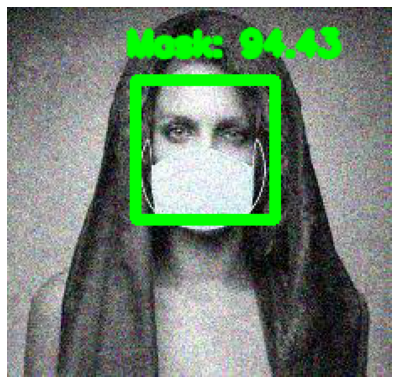

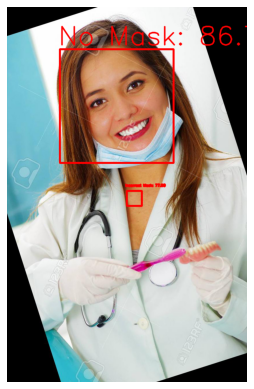

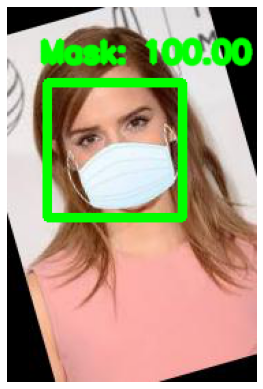

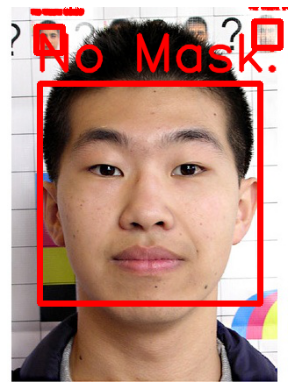

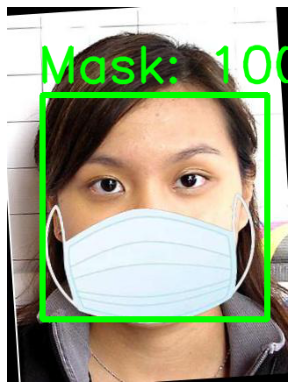

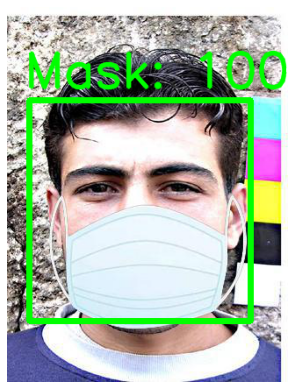

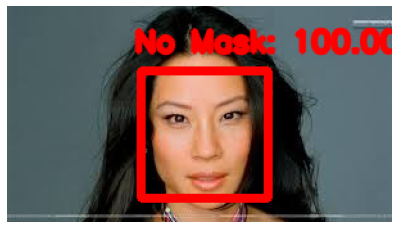

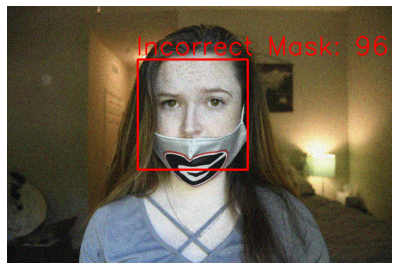

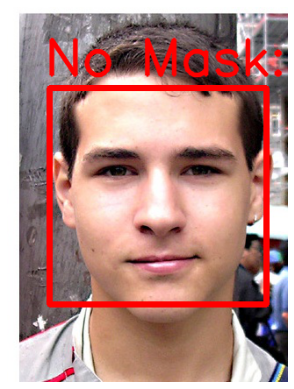

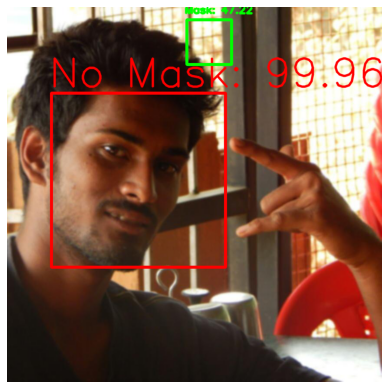

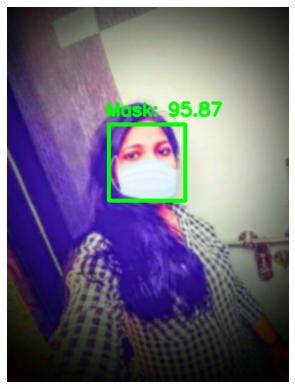

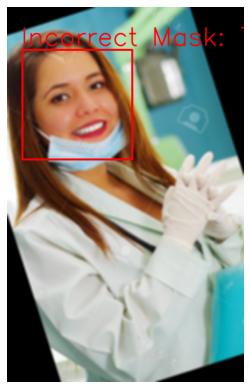

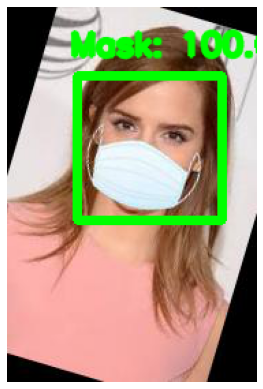

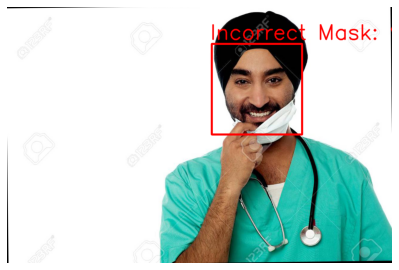

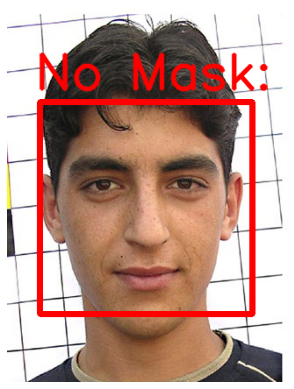

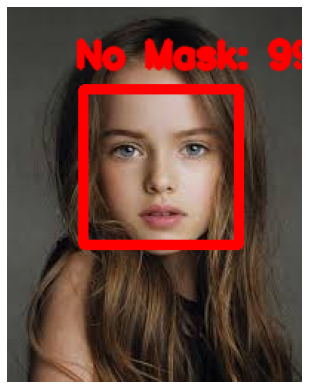

In [9]:
import random

images_arr = list(input_images)
count = 25

#  selecting random 25 images from the input array to identify it's classification i.e mask, no_mask, incorrect_mask

while count > 1:
  random_num = random.randint(0, 2078)
  img = images_arr[random_num]
  count -= 1
  
  img = plt.imread(img,format='8UC1')
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.05, 10)

  # Drawing bounding box against each identified face
  for (x, y, w, h) in faces:

      face = img[y:y+h, x:x+w]
      face = cv2.resize(face, (224, 224))
      face = img_to_array(face)
      face = preprocess_input(face)
      face = np.expand_dims(face, axis=0)
      
      (incorrect_mask, with_mask, without_mask) = model.predict(face)[0]
      with_mask = with_mask*100
      without_mask = without_mask*100
      incorrect_mask = incorrect_mask*100

      # print("face is ", face)
      # print("with_mask", with_mask)
      # print("without_mask", without_mask)
      # print("incorrect_mask", incorrect_mask)
      
      font = cv2.FONT_HERSHEY_SIMPLEX
      
      # Getting Text Size in pixel
      # print("Image Width: " , w)
      textSize = cv2.getTextSize(text="No Mask: " + str("%.2f" % round(with_mask, 2)), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, thickness=3)
      # print("Text Width: " , textSize[0][0])
      
      if with_mask > incorrect_mask and with_mask > without_mask:
          cv2.putText(img,
                      text = "Mask: " + str("%.2f" % round(with_mask, 2)),
                      org = (x-5,y-15),
                      fontFace=font,
                      fontScale = (2*w)/textSize[0][0],
                      color = (0, 255, 0),
                      thickness = 3,
                      lineType = cv2.LINE_AA)
          cv2.rectangle(img, (x, y), (x+w, y+h), (0,255,0), 5)

      elif without_mask > incorrect_mask and without_mask > with_mask:
          cv2.putText(img,
                      text = "No Mask: " + str("%.2f" % round(without_mask, 2)),
                      org = (x-5,y-15),
                      fontFace=font,
                      fontScale = (1.8*w)/textSize[0][0],
                      color = (255, 0, 0),
                      thickness = 3,
                      lineType = cv2.LINE_AA)
          cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 5)

      else:
          cv2.putText(img,
                      text = "Incorrect Mask: " + str("%.2f" % round(incorrect_mask, 2)),
                      org = (x-5,y-15),
                      fontFace=font,
                      fontScale = (1.8*w)/textSize[0][0],
                      color = (255, 0, 0),
                      thickness = 3,
                      lineType = cv2.LINE_AA)
          cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 5)

#  Display the images to represent their mask category
  if len(faces) > 0:
    plt.figure(figsize=(40,40)) 
    plt.subplot(5,5, count)    # the number of images in the grid is 5*5 (25)
    plt.imshow(img)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    cv2.imwrite("image" + str(count) + ".jpeg",img)
    plt.axis('off')
plt.show()